In [57]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

In [125]:
wave = np.linspace(6000., 6100., 1000)
flux = np.ones_like(wave)
flux += 0.3 * np.sin(2*np.pi/70. * wave)
flux += 0.2 * np.sin(2*np.pi/110. * wave + 50)
flux += 0.1 * np.sin(2*np.pi/90. * wave - 20)
continuum = np.copy(flux)

In [126]:
# add spectral lines:
spec = np.zeros_like(flux)
n_lines = 20
centers = np.random.uniform(min(wave), max(wave), n_lines)
amplitudes = np.random.uniform(-0.9, 0.0, n_lines)
sigmas = np.random.normal(0.5, 0.05, n_lines)
for i in range(n_lines):
    spec += amplitudes[i] * np.exp(-(wave-centers[i])**2/(2*sigmas[i]**2))
    
flux += spec
spec += 1. # bring it up from zero mean to perfect continuum

In [127]:
# add observation noise
flux += np.random.normal(0., 0.01, len(flux))

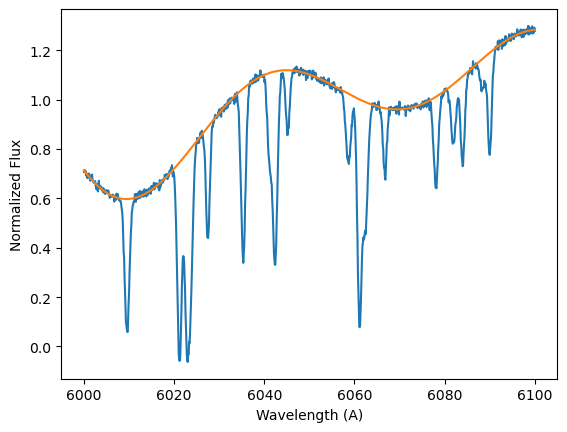

In [128]:
plt.plot(wave, flux)
plt.plot(wave, continuum)
#plt.plot(wave, spec)
plt.xlabel('Wavelength (A)')
plt.ylabel('Normalized Flux');

### noodling around with pywavelet:

In [74]:
import pywt

In [85]:
pywt.families()

['haar',
 'db',
 'sym',
 'coif',
 'bior',
 'rbio',
 'dmey',
 'gaus',
 'mexh',
 'morl',
 'cgau',
 'shan',
 'fbsp',
 'cmor']

In [137]:
w = pywt.Wavelet('sym5')
print(w)

Wavelet sym5
  Family name:    Symlets
  Short name:     sym
  Filters length: 10
  Orthogonal:     True
  Biorthogonal:   True
  Symmetry:       near symmetric
  DWT:            True
  CWT:            False


In [138]:
np.shape(w.filter_bank)

(4, 10)

In [139]:
cA, cD = pywt.dwt(flux, wavelet=w, mode='constant')

In [140]:
for level in pywt.wavedec(flux, wavelet=w):
    print(len(level))

24
24
39
70
132
256
504


#### from a pywt [demo script](https://github.com/PyWavelets/pywt/blob/master/demo/dwt_signal_decomposition.py):

In [135]:
def plot_signal_decomp(data, w, title):
    """Decompose and plot a signal S.

    S = An + Dn + Dn-1 + ... + D1
    """
    w = pywt.Wavelet(w)
    a = data
    ca = []
    cd = []
    for i in range(5):
        (a, d) = pywt.dwt(a, w, mode)
        #a = pywt.downcoef('a', a, w, mode, level=i+1)
        #d = pywt.downcoef('d', a, w, mode, level=i+1)
        ca.append(a)
        cd.append(d)

    rec_a = []
    rec_d = []

    for i, coeff in enumerate(ca):
        coeff_list = [coeff, None] + [None] * i
        rec_a.append(pywt.waverec(coeff_list, w))

    for i, coeff in enumerate(cd):
        coeff_list = [None, coeff] + [None] * i
        rec_d.append(pywt.waverec(coeff_list, w))

    fig = plt.figure(figsize=(10,12))
    ax_main = fig.add_subplot(len(rec_a) + 1, 1, 1)
    ax_main.set_title(title)
    ax_main.plot(data)
    ax_main.set_xlim(0, len(data) - 1)

    for i, y in enumerate(rec_a):
        ax = fig.add_subplot(len(rec_a) + 1, 2, 3 + i * 2)
        ax.plot(y, 'r')
        ax.set_xlim(0, len(y) - 1)
        ax.set_ylabel("A%d" % (i + 1))

    for i, y in enumerate(rec_d):
        ax = fig.add_subplot(len(rec_d) + 1, 2, 4 + i * 2)
        ax.plot(y, 'g')
        ax.set_xlim(0, len(y) - 1)
        ax.set_ylabel("D%d" % (i + 1))

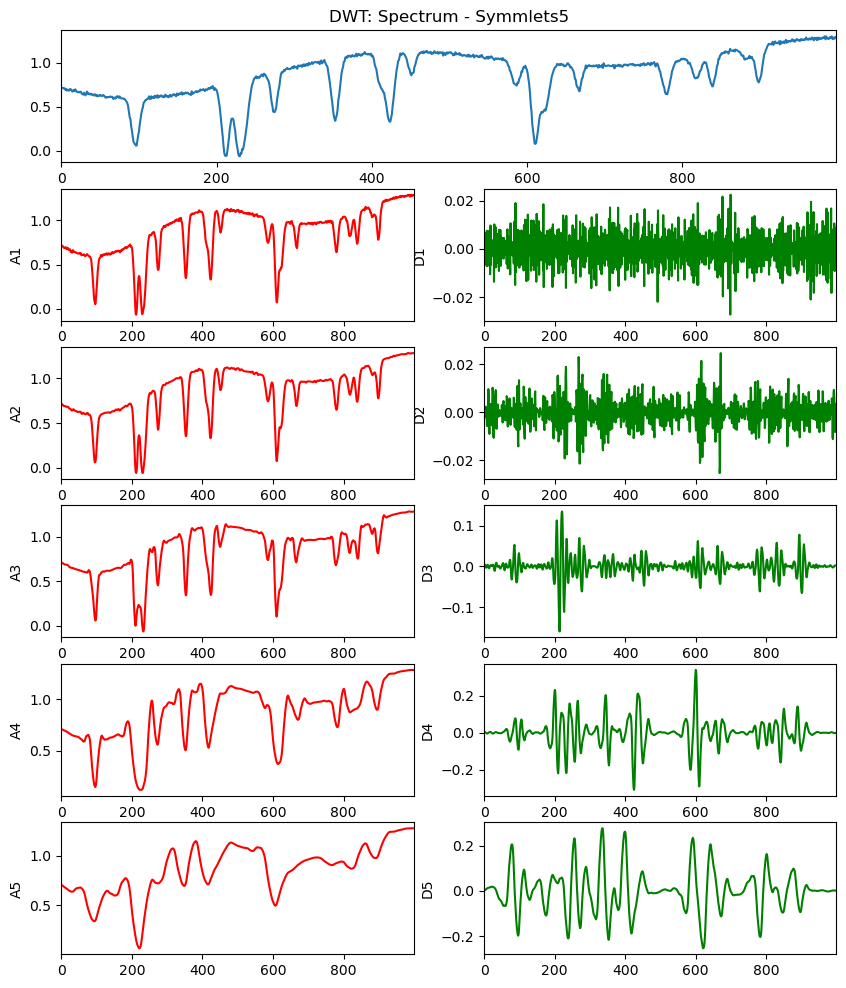

In [131]:
mode = pywt.Modes.constant # determines how the edges are padded
plot_signal_decomp(flux, 'sym5', "DWT: Spectrum - Symmlets5")

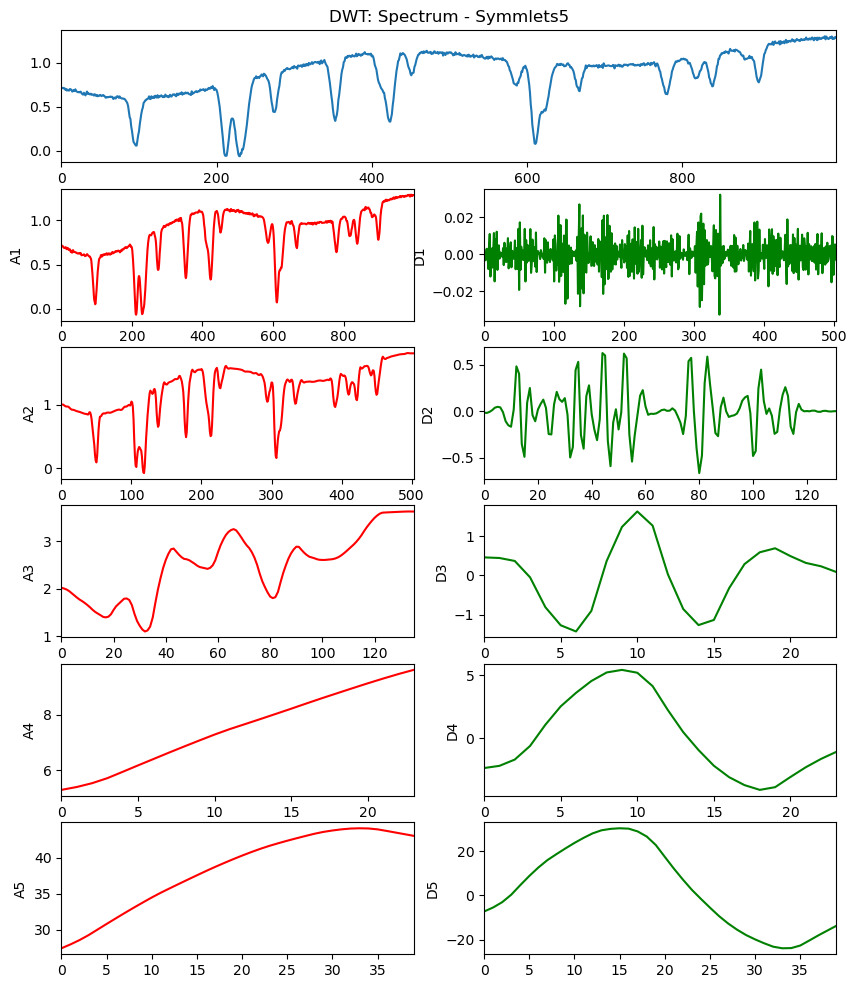

In [136]:
# this one was computed with pywt.downcoef() instead of a series of pywt.dwt():
plot_signal_decomp(flux, 'sym5', "DWT: Spectrum - Symmlets5")

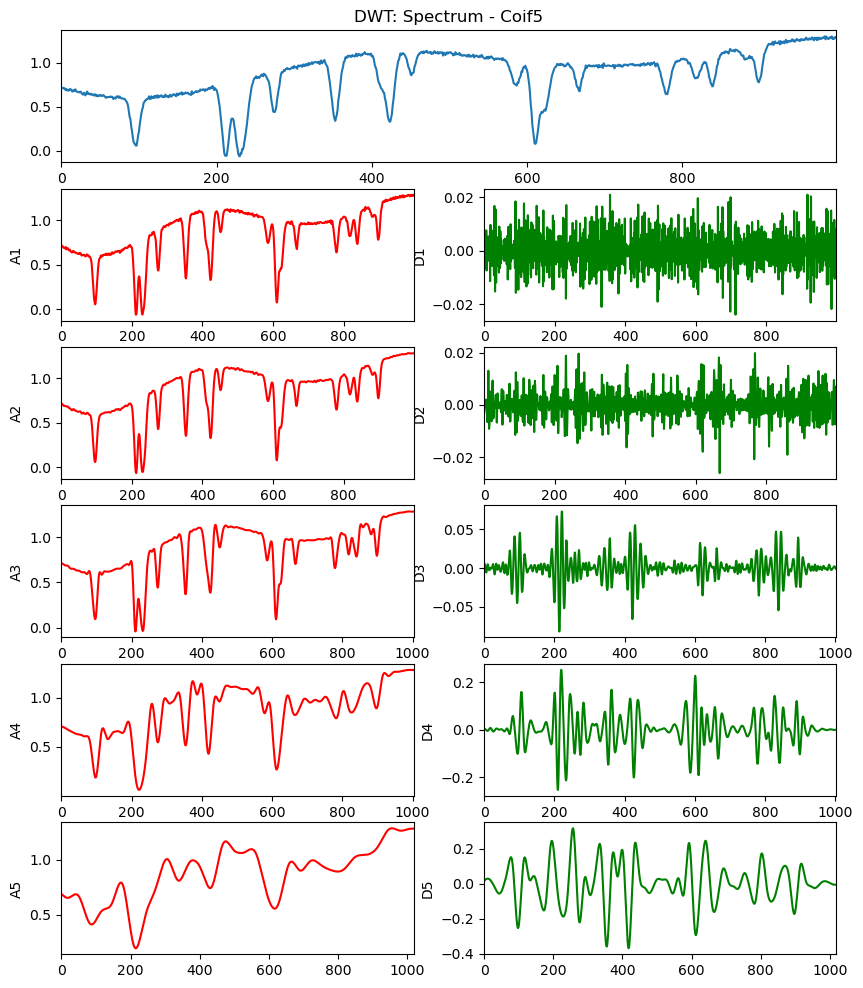

In [132]:
plot_signal_decomp(flux, 'coif5', "DWT: Spectrum - Coif5")

##### to-do:
- learn more about detail vs approximation coefficients
- choose a kernel that resembles a Gaussian?